In [1]:
import numpy as np
import pandas as pd

In [22]:
df = pd.read_csv(r'cars/cars.csv')

In [23]:
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [24]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [73]:
X = df.Volume
Y = df.Weight

In [75]:
#create our linear regression model
model = nn.Linear(1, 1)
#define our loss function (MSE)
criterion = nn.L1Loss()
#define our optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

In [76]:
#first we need to convert them to numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()
#need to have correct shape of X and Y.  Number of samples by 1 dimension
X = X.reshape(len(df.Volume),1)
Y = Y.reshape(len(df.Volume),1)

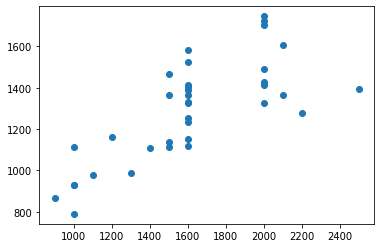

In [77]:
plt.scatter(X, Y)

In [78]:
#make numpy arrays into tensors
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [79]:
#train the model
epochs = 9
losses = []
for it in range(epochs):
    #zero the parameter gradients
    optimizer.zero_grad()
    
    #forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    #put loss into losses array set up above to plot later
    losses.append(loss.item())
    
    #backward and optimize
    loss.backward()
    optimizer.step()
    
    print(f'Epoch {it+1}/{epochs}, Loss:{loss.item():.4f}')

Epoch 1/9, Loss:924.9782
Epoch 2/9, Loss:665.4102
Epoch 3/9, Loss:405.8422
Epoch 4/9, Loss:197.2742
Epoch 5/9, Loss:158.9595
Epoch 6/9, Loss:158.6508
Epoch 7/9, Loss:158.3422
Epoch 8/9, Loss:158.6132
Epoch 9/9, Loss:158.4656


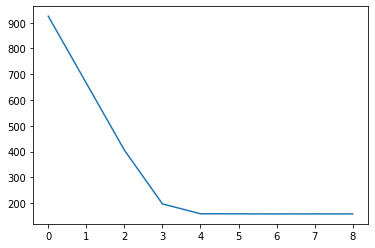

In [80]:
plt.plot(losses)

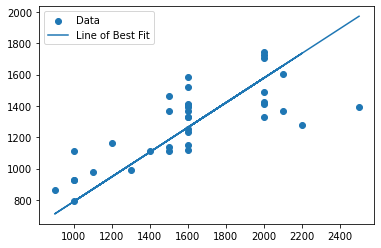

In [81]:
#plot the model
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label="Data")
plt.plot(X, predicted, label="Line of Best Fit")
plt.legend()
plt.show()

In [82]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.788989]] [0.16314961]
